In [1]:
import sys
sys.path.append('../src')

from models.SwinV2Model.train_cv import train_cv as train_SwinV2Model
from models.SwinV2Model.predict import predict as predict_SwinV2Model

from utils.show_graph import plot_history

c:\Users\negi\Documents\GitHub\tkser\technopro-food-package\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
package_model_path, loss_history, auc_history = train_SwinV2Model(
    num_epochs=25,
    learning_rate=1e-05,
    batch_size=2,
    n_splits=5,
    start_fold=3
)

[DEBUG] 2023-09-09 11:27:38 - Fold: 4/5
[DEBUG] 2023-09-09 11:27:38 - ----------------------------------------
c:\Users\negi\Documents\GitHub\tkser\technopro-food-package\.venv\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[DEBUG] 2023-09-09 11:27:40 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-09 11:27:40 - Starting training on cuda at 2023-09-09 11:27:40
[DEBUG] 2023-09-09 11:27:40 - Model parameters:
[DEBUG] 2023-09-09 11:27:40 - patch_embed.proj.weight: torch.Size([192, 3, 4, 4])
[DEBUG] 2023-09-09 11:27:40 - patch_embed.proj.bias: torch.Size([192])
[DEBUG] 2023-09-09 11:27:40 - patch_embed.norm.weight: torch.Size([192])
[DEBUG] 2023-09-09 11:27:40 - patch_embed.norm.bias: torch.Size([192])
[DEBUG] 2023-09-09 11:27:40 - layer

In [7]:
best_auc_model_paths = [
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230909073635_epoch_24_auc_0.8787.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230909082827_epoch_25_auc_0.8809.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230909092023_epoch_25_auc_0.8604.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230909112740_epoch_25_auc_0.8520.pth",
  "c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\SwinV2Model\\../../data/models/SwinV2Model_cv\\swintransformerv2_20230909122115_epoch_25_auc_0.8797.pth"
]

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_SwinV2Model(
      model_path=best_auc_model_path,
      batch_size=2,
      use_tta=True,
      seed=0
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_swintransformerv2_202309091316_5fold_tta_auc_0.87034.csv', index=False, header=False)

[DEBUG] 2023-09-09 15:24:11 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [19:38<00:00,  1.08s/it]
[DEBUG] 2023-09-09 15:43:50 - Finished prediction
[DEBUG] 2023-09-09 15:43:52 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [19:40<00:00,  1.08s/it]
[DEBUG] 2023-09-09 16:03:33 - Finished prediction
[DEBUG] 2023-09-09 16:03:35 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [19:12<00:00,  1.06s/it]
[DEBUG] 2023-09-09 16:22:48 - Finished prediction
[DEBUG] 2023-09-09 16:22:51 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [19:11<00:00,  1.06s/it]
[DEBUG] 2023-09-09 16:42:03 - Finished prediction
[DEBUG] 2023-09-09 16:42:05 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [19:10<00:00,  1.06s/it]
[DEBUG] 2023-09-09 17:01:16 - Finished prediction


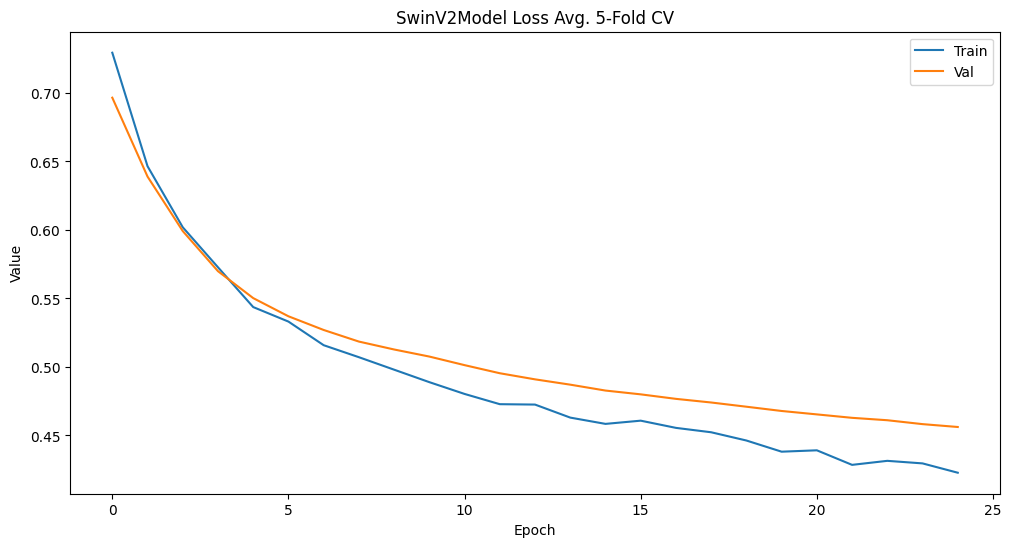

In [4]:
plot_history(loss_history, "SwinV2Model Loss Avg. 5-Fold CV")

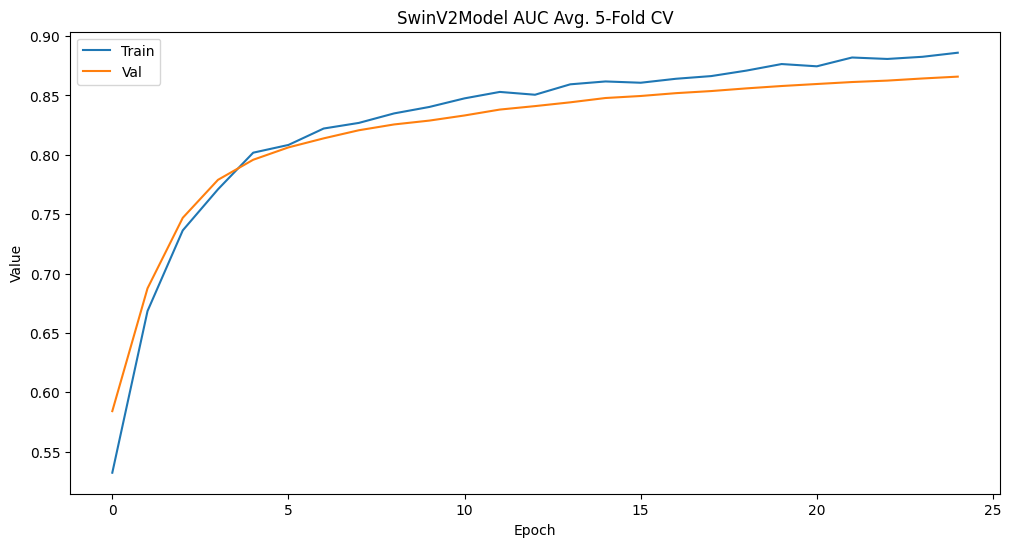

In [5]:
plot_history(auc_history, "SwinV2Model AUC Avg. 5-Fold CV")